<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Early-warning-signals,-analyzed-with-Python" data-toc-modified-id="Early-warning-signals,-analyzed-with-Python-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Early warning signals, analyzed with Python</a></span></li><li><span><a href="#Critical-slowing-down" data-toc-modified-id="Critical-slowing-down-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Critical slowing down</a></span></li><li><span><a href="#Flickering" data-toc-modified-id="Flickering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Flickering</a></span></li><li><span><a href="#Increasing-variance" data-toc-modified-id="Increasing-variance-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Increasing variance</a></span></li><li><span><a href="#Increasing-Autocorrelation" data-toc-modified-id="Increasing-Autocorrelation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Increasing Autocorrelation</a></span></li><li><span><a href="#Skewness-and-Kurtosis" data-toc-modified-id="Skewness-and-Kurtosis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Skewness and Kurtosis</a></span></li><li><span><a href="#Reference" data-toc-modified-id="Reference-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Reference</a></span></li></ul></div>

# Early warning signals, analyzed with Python

As described, interpreted and analyzed in the chapter on Analyzing critical transitions with Python, Scheffer et al. (2001) suggest the following model as a "minimal model of an ecosystem showing hysteresis"

$ \frac{dx}{dt}=a−bx+rf(x) $ with the Hill-function  $f(x)=\frac{x^p}{x^p+h^p}$

They use this model to demonstrate a methodology they call Early Warning Signals for detecting critical transitions.

The potential of dynamical systems to shift abruptly from one equilibrium to another triggers huge interest for attempts to prevent system collapses such as market crashes, aprupt climate changes or catastrophic shifts in fish or wildlife populations (Scheffer et al. 2009). The biggest challenge is to predict the “tipping points” where these sudden changes may happen (Scheffer et al. 2009). Several indicators have been pinpointed: critical slowing down, the so called flickering, an increasing autocorrelation, increasing variance and increasing skewness.

* Scheffer, M. / Carpenter, S. / Foley, J.A. / Folke, C. / Walker, B. (2001). Catastrophic shifts in ecosystems. Nature 413, p. 591-596.
* Scheffer, M. / et al., Early-warning signals for critical transitions, Nature 461, p. 53 - 59.

To start with, the following Python code generates a plot which shows that this model too has alternative stable states, depending on the parameter  r  (for the nutrient recycling rate). Other than in the analyzing chapter, we add a small amount of noise to the development to let the behavior become a bit more realistic. The amplitude of this noise is determined by a parameter  σ .

Furthermore, in order to demonstrate different possibilities, the system here is simulated as a differential equation with the numerical integration method odeint of the Python-modul scipy

Text(0.5, 1.0, 'Dynamics in time (parameter r)')

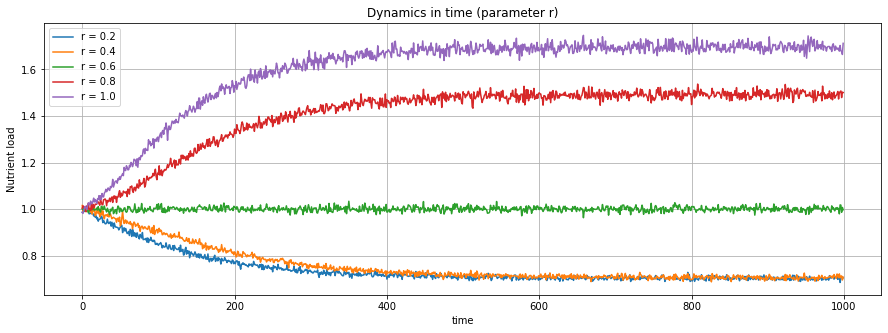

In [1]:
# import libraries
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# parameters
a = 0.7
b = 1.
r = 0.2
h = 1.  # half-saturation value

# take high p for steep Hill-function
p = 12

# determine strength of noise
sigma = 0.1

# define the system in a function
def Sys(X, t=0):
    # X[0] = x and x[1] = y    
    return np.array([a - b * X[0] + r *(X[0]**p / (X[0]**p + h**p))])

# generate 1000 linearly spaced numbers for x-axes
t = np.linspace(1, 10,  1000)

# initial value for X: 1
Sys0 = np.array([1])

# prepare plots
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)

# loop through various r values
while r <= 1:
    # integrate system
    X, infodict = integrate.odeint(Sys, Sys0, t, full_output=True)
    
    # generate noise, sigma * x * dW
    noise = sigma * np.random.normal(0, 0.1, 1000)
    
    # transform x and y, and add noise
    x = X.T + noise*X.T
    
    # plot
    ax.plot(x[0], label = 'r = %0.1f' % r)
    
    # increment r
    r += 0.2
    
# determine plotting specifics
ax.grid()
ax.legend(loc='best')
ax.set_xlabel('time')
ax.set_ylabel('Nutrient load')
ax.set_title('Dynamics in time (parameter r)')

# Critical slowing down

The most prominent indicator in the conception of EWS is critical slowing down suggesting that a decreasing rate of recovery from small perturbations predicts the approachment of a tipping point (i.e. a critical transition). The next piece of Python-code generates a plot showing the above development with a small perturbation applied after reaching equilibrium (at  time  = 500). Testing different  r -values, the plot shows that recovery time increases with decreasing distance to the tipping point. In this case, in order to be able to intervene, the system is modeled in the form of a difference equation.

Text(0.5, 1.0, 'Critical slowing down (parameter r)')

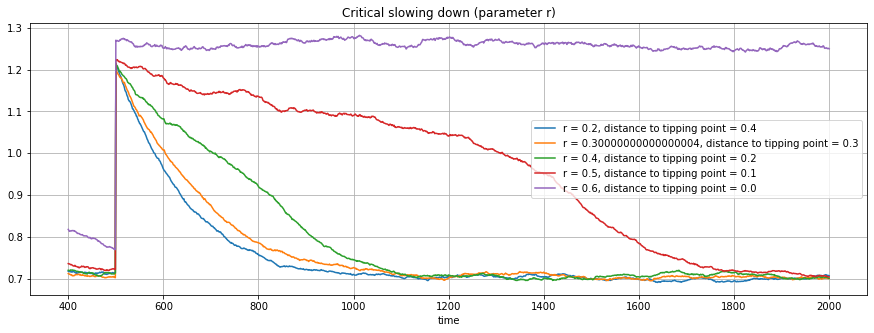

In [3]:
# critical slowing down (parameter r)
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)

# reduce strength of noise to make differences more distinct
sigma = 0.01

x = np.linspace(400, 2000, 1600)
dt = 0.01
r = 0.2

# loop through various r values
while r < 0.6:
    P = []
    P.append(1)

    i = 0
    while (i < 2000):
        
        # perturb only when equilibrium is reached, here after 500 timesteps
        if i == 500:
            P[i] = P[i - 1] + 0.5
            
        # the difference equation with noise added
        P.append(P[i] + (a - b * P[i] + r * (P[i]**p / (P[i]**p + h**p)))
                 * dt + sigma * P[i] * np.random.normal(0, 0.1))
        i += 1
    ax.plot(x, P[400:2000], label='r = ' + str(r) +
             ', distance to tipping point = %0.1f' % (0.6 - r))
    r += 0.1
    
ax.grid()
ax.legend(loc='best')
ax.set_xlabel('time')
ax.set_title('Critical slowing down (parameter r)')

# Flickering

Another noticable Early Warning Signal is a system's back and forth oscillation between two stable states close to a critical transition. This oscillation has been called flickering and was observed among others on the model of lake eutrophication (Wang et al. 2012). In the following calculation we increase  r  slowly and plot the system at  time  = 800. in order to show that flickering is noise-induced, we add a second curve (red) to the plot showing the same dynamics without added noise.

* Wang R. et al. (2012). Flickering gives early warning signals of a critical transition to a eutrophic lake state. Nature 492/2012, p 419 - 22

Text(0.5, 1.0, 'Flickering')

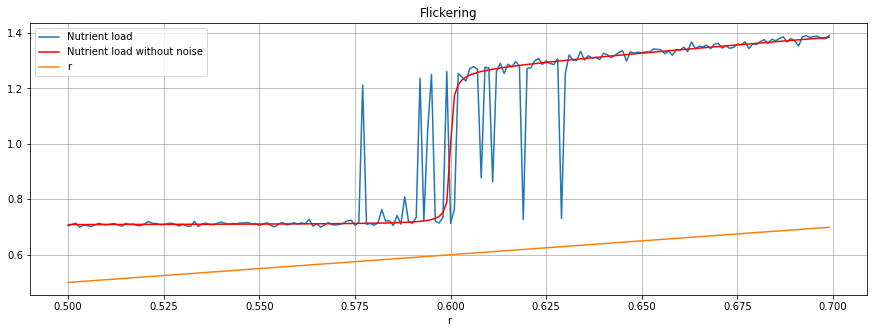

In [7]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)

# noise
sigma = 0.01

nutrient_noise = []
nutrient = []
R = []

dt = 0.01

r = 0.5

for j in range(200):
    P = []
    P.append(1)

    P_noise = []
    P_noise.append(1)

    i = 0
    
    # loop over time steps
    while (i < 2000):
        # without noise
        P.append(P[i] + (a - b * P[i] + r *
                         (P[i]**p / (P[i]**p + h**p))) * dt)

        # with noise
        P_noise.append(P_noise[i] + (a - b * P_noise[i] + r * (P_noise[i]**p / (P_noise[i]**p + h**p)))
                       * dt + sigma * P_noise[i] * np.random.normal(0, 0.1))

        i += 1

    # take only the values for time = 800
    nutrient_noise.append(P_noise[800])
    nutrient.append(P[800])

    R.append(r)
    r += 0.001

ax.plot(R, nutrient_noise, label='Nutrient load')
ax.plot(R, nutrient, 'r-', label='Nutrient load without noise')
ax.plot(R, R, label='r')

# Setting x-axis ticks label (manually)
ax.grid()
ax.legend(loc='best')
ax.set_xlabel('r')
ax.set_title('Flickering')

# Increasing variance

As yet other Early Warning Signals increasing variance (respectively standard deviation) and increasing autocorrelation in noise-induced oscillations have been reported. The following piece of code generates a plot that shows how standard deviation increases when  

Text(0.5, 1.0, 'Increasing standard deviation')

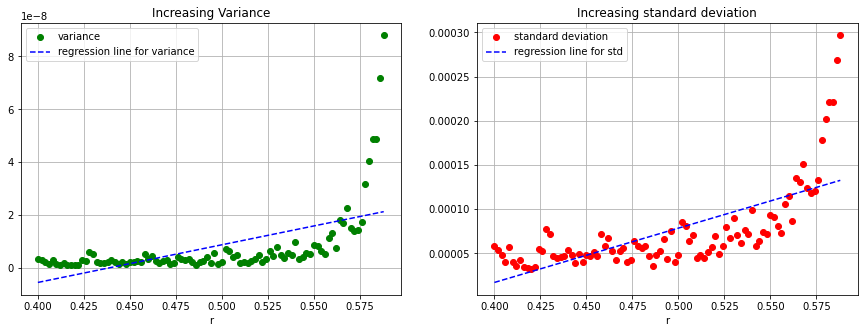

In [10]:
import pandas as pd

fig = plt.figure(figsize=(15, 5))
ax = fig.subplots(1, 2)

r = 0.4

# very small noise
sigma = 0.0001

x = np.linspace(400, 2000, 1600)

ws = 20  # size of running window

V = []   # variance
S = []   # std
R = []   # r-values

dt = 0.01

while r < 0.59:
    P_noise = []
#     P = []
    M = []
    P_noise.append(1)

    i = 0
    while (i < 2000):
        P_noise.append(P_noise[i] + (a - b * P_noise[i] + r * (P_noise[i]**p / (P_noise[i]**p + h**p)))
                       * dt + sigma * P_noise[i] * np.random.normal(0, 0.1))
        i += 1

    # transform output into a pandas-series for applying rolling window to it
    p_noise_series = pd.Series(P_noise[1000:2000])

    # store moving average
    M.append(p_noise_series.rolling(ws).mean())

    # take variance
    V.append(np.var(M[0]))

    # take standard deviation
    S.append(np.std(M[0]))

    # also store r
    R.append(r)
    r += 0.002

# regression-lines
x = range(len(V))
fitv = np.polyfit(x, V, 1)
fitv_fn = np.poly1d(fitv)  # takes x and returns an estimate for y

xx = range(len(S))
fits = np.polyfit(xx, S, 1)
fits_fn = np.poly1d(fits)  # takes x and returns an estimate for y

ax[0].plot(R, V, 'go', label='variance')
ax[0].plot(R, fitv_fn(x), 'b--', label='regression line for variance')
ax[0].grid()
ax[0].legend(loc='upper left')
ax[0].set_xlabel('r')
ax[0].set_title('Increasing Variance')


ax[1].plot(R, S, 'ro', label='standard deviation')
ax[1].plot(R, fits_fn(xx), '--b', label='regression line for std')

ax[1].grid()
ax[1].legend(loc='upper left')
ax[1].set_xlabel('r')
ax[1].set_title('Increasing standard deviation')

# Increasing Autocorrelation

Autocorrelation is a cross-correlation of data with itself at different points in time. It measures the similarity between observations as a function of the time lag between them. The following two pieces of code consider a time-lag of 1, indicating an increasing self-similarity of system states when approaching the tipping point. While the first piece just shows autocorrelation-values in relation to  r , the second piece visualizes the autocorrelation of data points in respect to four distinct values of  r . The plots position data points on the  x -axes in respect to their values at  t+1  on the  y -axes.

Text(0.5, 1.0, 'Auto-correlation at lag-1')

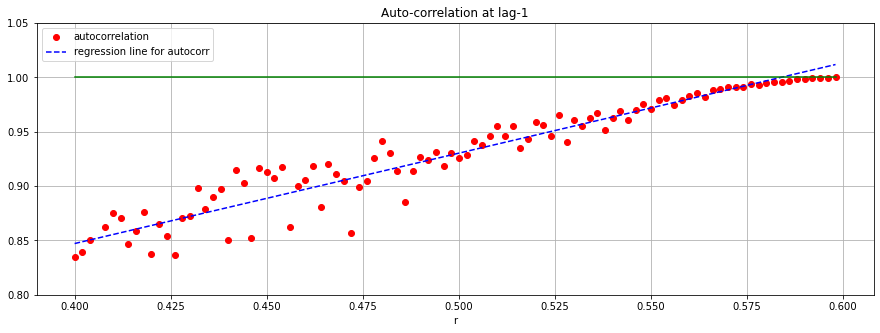

In [12]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)

ws = 5  # size of running window

A = []   # autocorrelation
R = []
One = []
r = 0.4

# noise
sigma = 0.01

# loop through various r values
while r < 0.6:
    M = []    
    
    # integrate system (refers to first piece of code)
    # t has already been previously defined
    X, infodict = integrate.odeint(Sys, Sys0, t, full_output=True)
    
    # generate noise, sigma * x * dW
    noise = sigma * np.random.normal(0, 0.1, 1000)
    
    # transform x and y, and add noise
    x = X.T + noise * X.T
    
    # consider data only after reaching equlibrium (timestepwise)    
    ppp = pd.Series(x[0][800:1000])
    
    # moving average
    M.append(ppp.rolling(ws, min_periods=1).mean())
    
    # use numpy's corrcoef-function 
    A.append(np.corrcoef(M[0][:-1],M[0][1:])[1,0])
    
    # append r values
    R.append(r)
    
    # append reference line of all ones
    One.append(1)
    # increment r
    r += 0.002
    
# regression-line
x = range(len(A))
fit = np.polyfit(x,A,1)
fit_fn = np.poly1d(fit) # takes x and returns an estimate for y
    
ax.plot(R, A, 'ro', label='autocorrelation') 
ax.plot(R, fit_fn(x), '--b', label='regression line for autocorr')
ax.plot(R, One, 'g-')
ax.grid()
ax.legend(loc='upper left')
ax.set_ylim(0.8, 1.05)
ax.set_xlabel('r')
ax.set_title('Auto-correlation at lag-1')

# Skewness and Kurtosis

Two more phenomena, observed when approaching a critical transition and thus suggested as Early Warning signals, are changes in the skewness and kurtosis of the distribution of noisy system states. 

While skewness indicates asymmetry in the distribution - with a negative skew indicating a right-sided concentration (a longer tail on the left side) and a positive skew indicating the opposite - , kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case.

The following code generates plots showing the devolpment of skewness and kurtosis when  r  reaches the tipping point and two histograms showing distributions of system states at different values of  r .

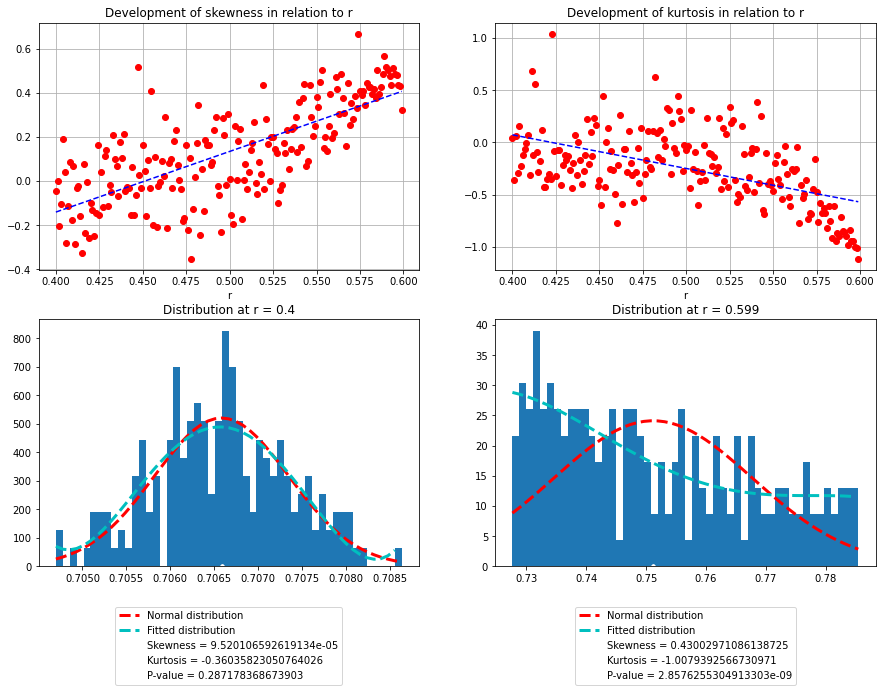

In [13]:
import scipy as sp
from scipy import stats
from scipy.optimize import leastsq
from scipy.stats import norm
import matplotlib.mlab as mlab

# in a normal distribution skewness is 0 and kurtosis is 

# prepare plots
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

r = 0.4

R = []
S = []
K = []

# determine strength of noise
sigma = 0.01

# loop through various r values
while r <= 0.6:
    M = []
    
    # integrate system
    X, infodict = integrate.odeint(Sys, Sys0, t, full_output=True)
    
    # generate noise, sigma * x * dW
    noise = sigma * np.random.normal(0, 0.1, 1000)
    
    # transform x and y, and add noise
    x = X.T + noise * X.T 
    
    # far from critical transition
    if r >= 0.4 and r <= 0.401:
        x1 = x[0][800:1000]
    
    # close to critical transition
    if r >= 0.598 and r <= 0.599:
        x2 = x[0][800:1000]
        
        
    # use scipy to compute for skewness and kurtosis     
    S.append(sp.stats.skew(x[0][800:1000]))
    K.append(sp.stats.kurtosis(x[0][800:1000]))
    
    # append r values
    R.append(r)
    # increment r
    r += 0.001

# regression-lines
x = range(len(S))
fits = np.polyfit(x,S,1)
fit_fns = np.poly1d(fits)
fitk = np.polyfit(x,K,1)
fit_fnk = np.poly1d(fitk)

# plot timelines 
ax1.plot(R, S, 'ro') 
ax1.plot(R, fit_fns(x), '--b')
ax1.grid()
ax1.set_xlabel('r')
ax1.set_title('Development of skewness in relation to r')

ax2.plot(R, K, 'ro') 
ax2.plot(R, fit_fnk(x), '--b')
ax2.grid()
ax2.set_xlabel('r')
ax2.set_title('Development of kurtosis in relation to r')

# show distributions at different r-values 
# histogram
n1, bins1, patches1 = ax3.hist(x1, 50, density=True)

## far from critical transition

# add a normal-distribution line with same mean and std
y1 = norm.pdf(bins1, np.mean(x1), np.std(x1))
ax3.plot(bins1, y1, 'r--', linewidth=3, label = 'Normal distribution')

# add a best fit line - polynomial of degree 4
p1 = np.polyfit(bins1[:-1], n1, 4)

fitted1 = np.polyval(p1, bins1[:-1])
ax3.plot(bins1[:-1], fitted1, 'c--', linewidth=3, label='Fitted distribution')
ax3.set_title('Distribution at r = 0.4')

# use scipy.stats.describe to calculate (length, (min, max), mean, var, skewness, kurtosis)
d1 = sp.stats.describe(x1)
ax3.plot(d1[2], 0, 'w.', label = 'Skewness = ' + str(d1[4]))
ax3.plot(d1[2], 0, 'w.', label = 'Kurtosis = ' + str(d1[5]))


# use scipy.stats.kurtosistest to calculate the p-value (the second provided value), 
# giving a probability that this is a normal distribution
pn1 = sp.stats.kurtosistest(x1)
ax3.plot(d1[2], 0, 'w.', label = 'P-value = ' + str(pn1[1]))
ax3.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5))

## close to critical transition

# histogram
n2, bins2, patches2 = ax4.hist(x2, 50, density=True)

# add a normal-distribution line with same mean and std
y2 = norm.pdf(bins2, np.mean(x2), np.std(x2))

ax4.plot(bins2, y2, 'r--', linewidth=3, label = 'Normal distribution')

# add a best fit line - polynomial of degree 4
p2 = np.polyfit(bins2[:-1], n2, 4)
fitted2 = np.polyval(p2, bins2[:-1])
ax4.plot(bins2[:-1], fitted2, 'c--', linewidth=3, label='Fitted distribution')
ax4.set_title('Distribution at r = 0.599')

# use scipy.stats.describe to calculate (length, (min, max), mean, var, skewness, kurtosis)
d2 = sp.stats.describe(x2)
ax4.plot(d2[2], 0, 'w.', label = 'Skewness = ' + str(d2[4]))
ax4.plot(d2[2], 0, 'w.', label = 'Kurtosis = ' + str(d2[5]))

# use scipy.stats.kurtosistest to calculate the p-value (the second provided value), 
# giving a probability that this is a normal distribution
pn2 = sp.stats.kurtosistest(x2)
ax4.plot(d2[2], 0, 'w.', label = 'P-value = ' + str(pn2[1]))
ax4.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5))

# Reference

http://systems-sciences.uni-graz.at/etextbook/sw2/ews.html